# Historical-Future scenarios

In [1]:
%cd ..

/home/rocky/project/mce


In [141]:
import yaml
import numpy as np
import pandas as pd
from mce.core import ScenarioBase
from mce.util.plot_base import PlotBase

In [36]:
myplt = PlotBase(palette='ipcc_wg1')

## Input data

In [3]:
ds_hist = ScenarioBase(outpath='untracked/ds_historical_best.h5', mode='r')

[2025-04-14 11:51:22 mce.core] INFO:untracked/ds_historical_best.h5 already exists
[2025-04-14 11:51:22 mce.core] INFO:file untracked/ds_historical_best.h5 opened with mode=r


In [4]:
ds_rcmip2 = ScenarioBase(outpath='untracked/ds_rcmip2.h5', mode='r')
ds_ar6db_imp = ScenarioBase(outpath='untracked/ds_ar6db_imp.h5', mode='r')

[2025-04-14 11:52:22 mce.core] INFO:untracked/ds_rcmip2.h5 already exists
[2025-04-14 11:52:22 mce.core] INFO:file untracked/ds_rcmip2.h5 opened with mode=r
[2025-04-14 11:52:22 mce.core] INFO:untracked/ds_ar6db_imp.h5 already exists
[2025-04-14 11:52:22 mce.core] INFO:file untracked/ds_ar6db_imp.h5 opened with mode=r


In [73]:
list(ds_rcmip2.file)

['1pctCO2',
 '1pctCO2-4xext',
 'abrupt-0p5xCO2',
 'abrupt-2xCO2',
 'abrupt-4xCO2',
 'esm-bell-1000PgC',
 'esm-bell-2000PgC',
 'esm-bell-750PgC',
 'esm-pi-CO2pulse',
 'esm-pi-cdr-pulse',
 'esm-piControl',
 'historical',
 'historical-cmip5',
 'piControl',
 'rcp26',
 'rcp45',
 'rcp60',
 'rcp85',
 'ssp119',
 'ssp126',
 'ssp245',
 'ssp370',
 'ssp370-lowNTCF-aerchemmip',
 'ssp370-lowNTCF-gidden',
 'ssp434',
 'ssp460',
 'ssp534-over',
 'ssp585']

In [75]:
# Select five SSP scenarios from RCMIP2
scenarios_ssp = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

In [76]:
list(ds_ar6db_imp.file)

['CurPol', 'GS', 'LD', 'ModAct', 'Neg', 'Neg-2.0', 'Ren', 'Ren-2.0', 'SP']

Five illustrative mitigation pathways
- IMP-SP: mitigation in the context of broader sustainable development;
- IMP-LD: strong emphasis on energy demand reductions;
- IMP-Ren: heavy reliance on renewables;
- IMP-Neg: extensive use of carbon dioxide removal (CDR) in the energy and the industry sectors to achieve net negative emissions;
- IMP-GS: the implications of a less rapid and gradual strengthening of near-term mitigation actions

Ren and Neg have 2-degC sensitivity case

Two reference pathways as the consequences of current policies and pledges
- ModAct: Moderate action, explores the impact of implementing the Nationally Determined Contributions (NDCs) as formulated in 2020 and some further strengthening after that;
- CurPol: explores the consequences of continuing along the path of implemented climate policies in 2020 and only a gradual strengthening after that

In [142]:
with open('untracked/ar6db_var_units.yml') as f1:
    ar6db_var_units = yaml.safe_load(f1)

In [146]:
list(ar6db_var_units)

['units_id', 'var_id']

## Create future scenarios including a transition period

In [118]:
ds = ScenarioBase()

[2025-04-14 16:20:52 mce.core] INFO:in-memory file opened


### GHG concentrations

In [27]:
g = ds_hist.file['historical_best/input/conc']
df = pd.DataFrame({k: v for k, v in g.items()}).set_index('time')
df.columns = pd.MultiIndex.from_tuples([
    (k, v.attrs['units']) for k, v in g.items() if k != 'time'
])
df_hist = df
df_hist

,C2F6,C3F8,C7F16,C8F18,CCl4,CF4,CFC-11,CFC-112,CFC-112a,CFC-113,...,Halon-2402,N2O,NF3,SF6,SO2F2,c-C4F8,i-C6F14,n-C4F10,n-C5F12,n-C6F14
,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt,...,ppt,ppb,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt
time,,,,,,,,,,,,,,,,,,,,,
1750,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.10,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
1751,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.12,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
1752,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.14,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
1753,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.16,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
1754,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.18,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,4.940000,0.70,0.11984,0.097,77.000,86.40,223.9,0.4,0.0704,69.20,...,0.4,333.30,2.3,10.270,2.600000,1.8114,0.0690,0.2073,0.1528,0.2312
2021,5.030000,0.72,0.12132,0.098,76.000,87.40,221.6,0.4,0.0712,68.60,...,0.4,334.60,2.5,10.650,2.700000,1.8742,0.0704,0.2114,0.1564,0.2328


In [103]:
ntrans = 4
wgt_hist = pd.Series(np.linspace(0.8, 0.2, ntrans), index=df_hist.index[-ntrans:])
wgt_hist

time
2021    0.8
2022    0.6
2023    0.4
2024    0.2
dtype: float64

In [101]:
year_start_merge = wgt_hist.index[0]
year_end = 2100
year_start_merge, year_end

(2021, 2100)

In [119]:
for scenario in scenarios_ssp:
    g = ds_rcmip2.file[f'{scenario}/input/conc']
    df = (
        pd.DataFrame({k: v for k, v in g.items()})
        .set_index('time')
        .loc[year_start_merge:year_end]
    )
    df.columns = pd.MultiIndex.from_tuples([
        (k, v.attrs['units']) for k, v in g.items() if k != 'time'
    ])

    wgt = pd.Series(1., index=df.index)
    wgt.iloc[:ntrans] = np.linspace(0.2, 0.8, 4)

    # Ensure weight validity
    if not np.allclose(pd.concat([wgt_hist, wgt], axis=1).sum(axis=1), 1.):
        raise ValueError('invalid weights')

    df = (
        (df_hist.loc[year_start_merge:] * wgt_hist.values[:, None])
        .reindex(df.index, fill_value=0.)
        + df * wgt.values[:, None]
    ).dropna(axis=1) # some halogens in historical are dropped

    g = ds.file.create_group(f'{scenario}/input/conc')
    dset = g.create_dataset('time', data=df.index.values)
    dset.attrs['units'] = 'yr'
    
    for (gas, units), v in df.items():
        dset = g.create_dataset(gas, data=v.values)
        dset.attrs['units'] = units

In [153]:
list(ds_ar6db_imp.file[f'{scenario}/Emissions'])

['units_id', 'value', 'variable_id', 'year']

In [154]:
scenario = 'CurPol'

data = []
for cat in ['Emissions', 'AR6 climate diagnostics']:
    g = ds_ar6db_imp.file[f'{scenario}/{cat}']
    mi = pd.MultiIndex.from_tuples(zip(g['variable_id'], g['units_id']))
    data.append(
        pd.DataFrame(g['value'], index=mi, columns=g['year'])
        .rename(ar6db_var_units['var_id'], level=0)
        .rename(ar6db_var_units['units_id'], level=1)
    )

In [156]:
pd.unique(data[0].index.get_level_values(0))

array(['Emissions|BC', 'Emissions|CH4', 'Emissions|CH4|AFOLU',
       'Emissions|CH4|Energy|Demand|Industry',
       'Emissions|CH4|Energy|Demand|Residential and Commercial',
       'Emissions|CH4|Energy|Demand|Transportation',
       'Emissions|CH4|Energy|Supply', 'Emissions|CO', 'Emissions|CO2',
       'Emissions|CO2|AFOLU',
       'Emissions|CO2|Energy and Industrial Processes',
       'Emissions|CO2|Energy|Demand',
       'Emissions|CO2|Energy|Demand|Industry',
       'Emissions|CO2|Energy|Demand|Residential and Commercial',
       'Emissions|CO2|Energy|Demand|Transportation',
       'Emissions|CO2|Energy|Supply', 'Emissions|F-Gases',
       'Emissions|HFC', 'Emissions|HFC|HFC125', 'Emissions|HFC|HFC134a',
       'Emissions|HFC|HFC143a', 'Emissions|HFC|HFC227ea',
       'Emissions|HFC|HFC23', 'Emissions|HFC|HFC32', 'Emissions|N2O',
       'Emissions|N2O|AFOLU', 'Emissions|NH3', 'Emissions|NOx',
       'Emissions|OC', 'Emissions|PFC', 'Emissions|SF6',
       'Emissions|Sulfur', 'Emi

In [150]:
pd.unique(df.index.get_level_values(0))

array(['AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|95.0th Percentile',
       'AR6 climate diagnostics|Exceedance Probability 1.5C|FaIRv1.6.2',
       'A

## Check example data

In [133]:
scenario = 'ssp245'
gas = 'CO2'

g = ds_hist.file['historical_best/input/conc']
d_hist = pd.Series(g[gas], index=g['time'])

g = ds_rcmip2.file[f'{scenario}/input/conc']
d_future = pd.Series(g[gas], index=g['time']).loc[year_start_merge:year_end]

g = ds.file[f'{scenario}/input/conc']
d_merged = pd.Series(g[gas], index=g['time'])

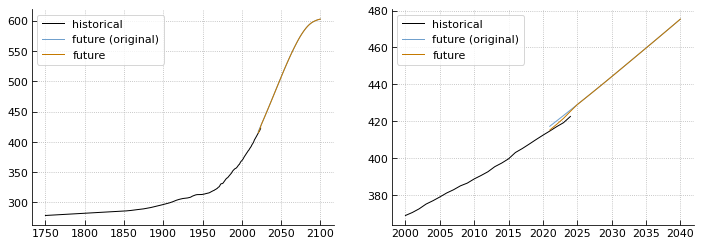

In [134]:
myplt.init_regular(2, col=2)

ax = myplt(0)

data = [d_hist, d_future, d_merged]
labels = ['historical', 'future (original)', 'future']

for d1, label in zip(data, labels):
    ax.plot(d1.index, d1, label=label)

ax.legend()
ax.grid()

ax = myplt(1)

for d1, label in zip(data, labels):
    d1 = d1.loc[2000:2040]
    ax.plot(d1.index, d1, label=label)

ax.legend()
ax.grid()